In [1]:
# import packages
import skimage.io as io
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

Load the left and right image

In [2]:
img_l = io.imread('Bicycle1-perfect/im0.png')
img_r = io.imread('Bicycle1-perfect/im1.png')

Scanline

-20


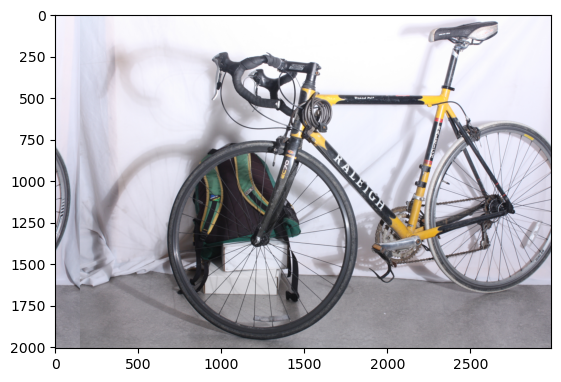

In [9]:
x_0 = 1000
y_0 = 1000
block_size = 5
disparity_range = np.arange(-20,20)
dist = []
for i in disparity_range:

    print(i)
    break

plt.imshow(np.roll(img_r, 150, axis=1))
plt.show()